# Data Visualization

Welcome to lab 4! This week, we'll learn how to do some basic data visualizations using both the `pandas` library and the standard Python plotting library, Matplotlib. [Here](https://matplotlib.org/gallery/index.html) is a useful gallery of some nice Matplotlib visualizations with the accompanying code. It might be useful to refer to the gallery to make some nice plots for your midterm project!

First, set up the imports by running the cell below.

In [101]:
import numpy as np
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 12})
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Movies and Matplotlib
Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you. [This tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) provides a nice general overview of the main functionality.

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/


**NOTE**: If you are using an older version of jupyter, you need to run a "magic" command to see the plots inline with the notebook. Users of jupyter notebook 1.0 and above, don't need to run the cell below. **If you are using our JupyterHub environment, you don't need this magic command.**

In [102]:
# Check your Jupyter Notebook version
!jupyter --version

Selected Jupyter core packages...


IPython          : 8.17.2
ipykernel        : 6.26.0
ipywidgets       : not installed
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : 2.12.1
jupyterlab       : 4.0.10
nbclient         : 0.9.0
nbconvert        : 7.14.0
nbformat         : 5.9.2
notebook         : 7.0.7
qtconsole        : not installed
traitlets        : 5.13.0


In [103]:
import matplotlib
%matplotlib inline

#### Matplotlib basics
Notice the import statement for Matplotlib is `import matplotlib.pyplot as plt`. Pyplot is the main functionality we use with data in Python, so you'll see `plt.some_function()` throughout Matplotlib code.

There are a few basic components to a `matplotlib` plot:
- **Figure**: The "canvas" which contains one or more plots. Most commonly, you might set the size of the Figure using `plt.figure(figsize=(width, height)`.

- **Axes**: This is what we generally think of as a plot (bad naming). Each Axes has a title, an x-label and a y-label. You can easily set these using `plt.title('a title')`, `plt.xlabel('an x label')`, and `plt.ylabel('a y label')`.

- **Axis**: This refers to what we typically think of as an axis; you can set the limits of the plot using the Axis.

Run the cell below for a very basic plot in Matplotlib demostrating some functionality. The `plt.plot()` function takes in either lists or arrays.

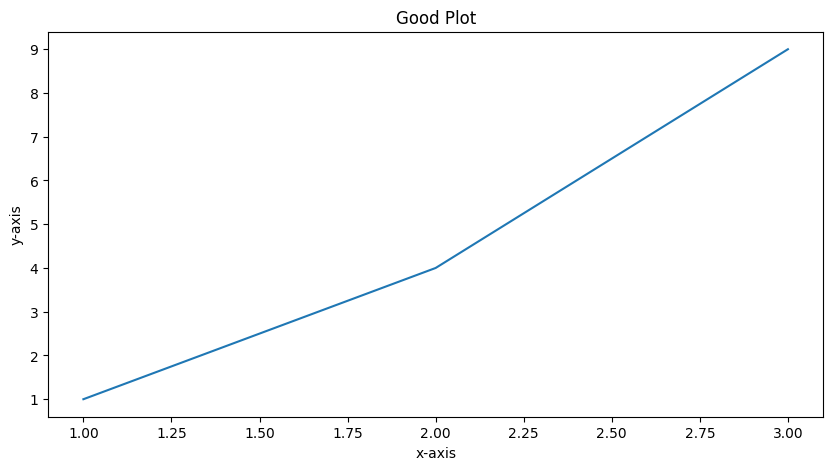

In [134]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3], [1,4,9])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Good Plot')
plt.show()
plt.

**NOTE**: If you try running .py scripts in an IDE like PyCharm or VSCode Text Editor. You will not see the plots in a notebook, instead if you are using another editor, you'll use: `plt.show()` at the end of all your plotting commands to have the figure pop up in another window.

The movies_by_year dataset in the textbook has information about movie sales in recent years. We will explore some basic visualizations with the `pandas` library as well as Matplotlib on this dataset. Let's start by loading the data:

In [105]:
df_movies_by_year = pd.read_csv("LAB 4 Data/movies_by_year-1.csv")
df_movies_by_year.head(10)

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
5,2010,10565.6,536,Toy Story 3
6,2009,10595.5,521,Avatar
7,2008,9630.7,608,The Dark Knight
8,2007,9663.8,631,Spider-Man 3
9,2006,9209.5,608,Dead Man's Chest


**Question 1.** Make a histogram of the number of movies per year using pandas' default `hist()` function

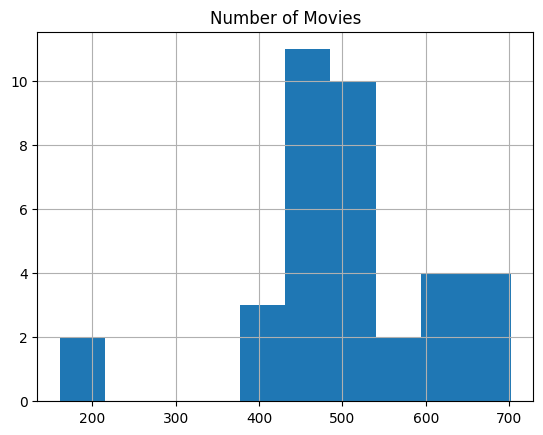

In [141]:
df_movies_by_year.hist(column='Number of Movies')
plt.show()


Read the [pandas.DataFrame.hist document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) and you will see many parameters to be set. One is that you can change the number of bins presented in your histogram, you can play with that and find a number of bins that look good to you. Also, you will see in the document that this `hist` function actually calls `matplotlib.pyplot.hist()`. In the next question, we will use the function by ourselves.


**Question 2.** Use `Matplotlib` to recreate the histogram from Question 1 with axis labels and a title that make sense. Try to find the appropriate way to do this yourself (google is extremely helpful for this kind of stuff). We'll get you started by creating an array from the `Number of Movies` column.

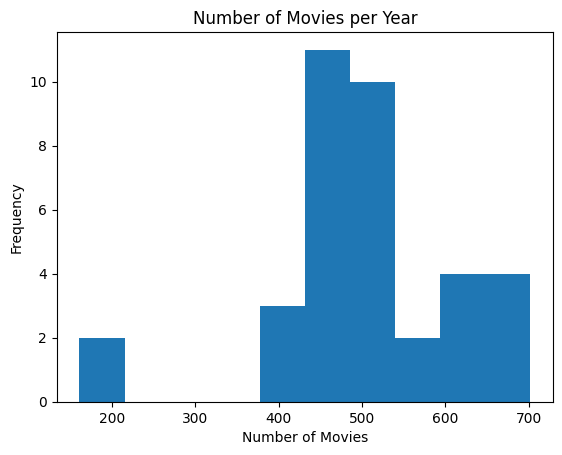

In [136]:
number_of_movies = np.array(df_movies_by_year['Number of Movies'])
number_of_movies

plt.hist(number_of_movies)
plt.title('Number of Movies per Year')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.show()

Matplotlib is the base of all plots in Python, so the Pandas library actually uses Matplotlib to do its plotting. This means that when you create a visualizations directly from a `pandas` DataFrame, you can actually use Matplotlib commands within the same Jupyter cell and it will update your original figure, like this:

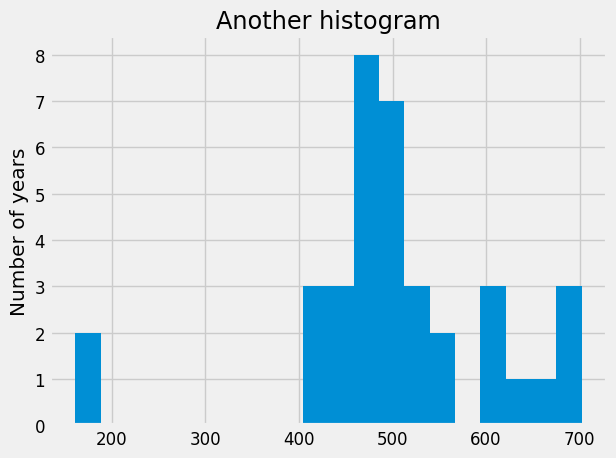

In [108]:
df_movies_by_year['Number of Movies'].hist(bins=20)
plt.title('Another histogram')
plt.ylabel('Number of years');

Hint! If you don't want the little text to appear above your graph, you can add a `;` at the end of the line. For example, replace `plt.ylabel('Number of years')` with `plt.ylabel('Number of years');`

Another nice functionality of Matplotlib is the ability to display multiple plots in the same figure. In the following code, the subplot call specifies (`nrows`, `ncols`, `index`) where `index` ranges from 1 to `nrows*ncols`. The commas in the subplot call are optional if `nrows*ncols<=9`. So `subplot(211)` is identical to `subplot(2, 1, 1)`. The above information can also be obtained from the [matplotlib.pyplot.subplot document](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).

You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use axes, which allows you to specify the location as `axes([left, bottom, width, height])` where all values are in fractional (0 to 1) coordinates. See Axes Demo for an example of placing axes manually and Basic Subplot Demo for an example with lots of subplots.

You can create multiple figures by using multiple figure calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

Text(0.5, 0.98, '2 plots')

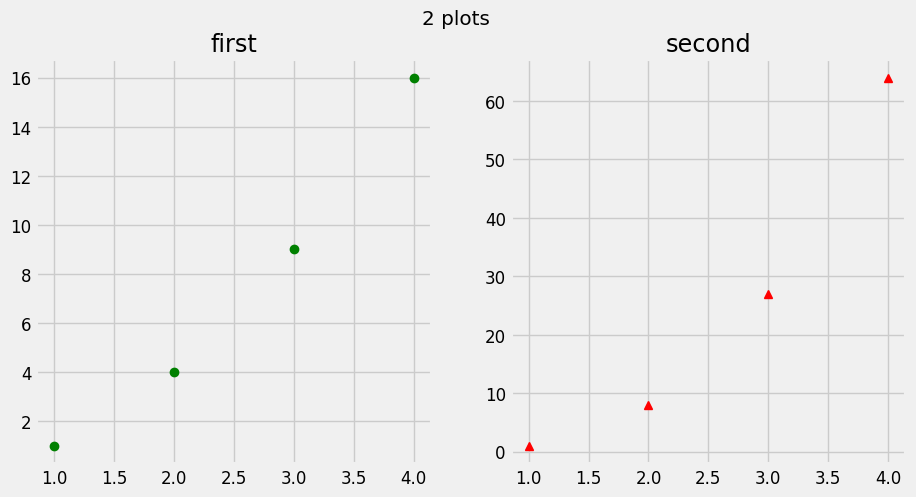

In [109]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot([1,2,3,4], [1,4,9,16], "go")
plt.title("first")

plt.subplot(1,2,2)
plt.plot([1,2,3,4], [1,8,27,64], "r^")
plt.title("second")

plt.suptitle("2 plots")

Note that, for every `x, y` pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from **MATLAB**, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. In the plot above, the "go" argument is telling the first plot to use "green circles", and "r^" is telling the second plot to use "red triangles".

**Question 3.** Suppose we hypothesize that the number of movies by year has a similar distribution to the total amount of money that year. Create side-by-side histograms to investigate this hypothesis.

Text(0.5, 0.98, '2 plots')

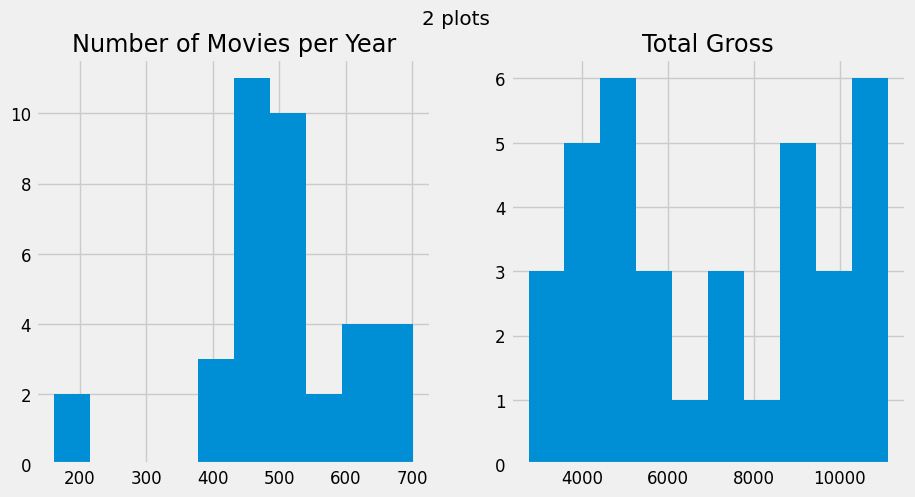

In [110]:
num_movies = df_movies_by_year['Number of Movies']
total_gross = df_movies_by_year['Total Gross']

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
num_movies.hist()
plt.title('Number of Movies per Year')

plt.subplot(1, 2, 2)enrollment_public = colleges_df.loc[colleges_df['institutionalControl'] == 'public', ['enrollment']]['enrollment'].mean()
enrollment_private = colleges_df.loc[colleges_df['institutionalControl'] == 'private', ['enrollment']]['enrollment'].mean()

plt.bar(['Public', 'Private'], [enrollment_public, enrollment_private])
plt.show()
total_gross.hist()
plt.title('Total Gross')

plt.suptitle("2 plots")

Hmm, this doesn't look very compelling. Maybe there's a better plot to compare these distributions.

**Question 4.** Create a scatterplot comparing `Number of Movies` and `Total Gross` using **Matplotlib** method. Why is this a useful visualization?



Text(0, 0.5, 'Total Gross')

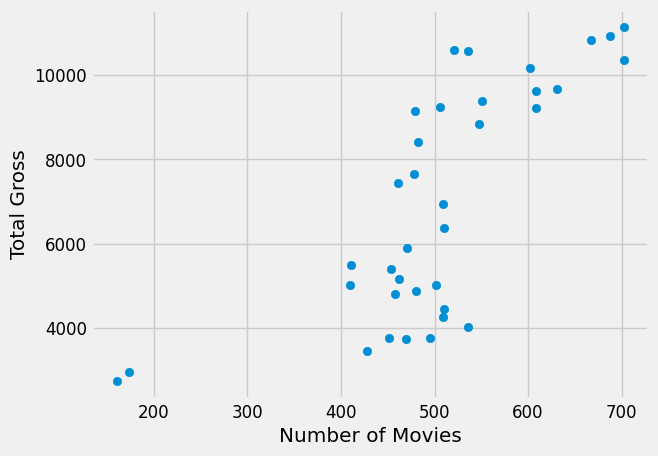

In [111]:
plt.scatter(num_movies, total_gross)
plt.xlabel('Number of Movies')
plt.ylabel('Total Gross')

# This shows the relationship or correlation between the two variables 

**Question 5.** Finally, when we have data with a temporal component, it is typically useful to look at trends over time using a line plot. Make line plots showing `Total Gross` across the years using Matplotlib methods. You'll need to extract the `Year` column as an array for the Matplotlib approach, so we'll do that for you.

Text(0, 0.5, 'Total Gross')

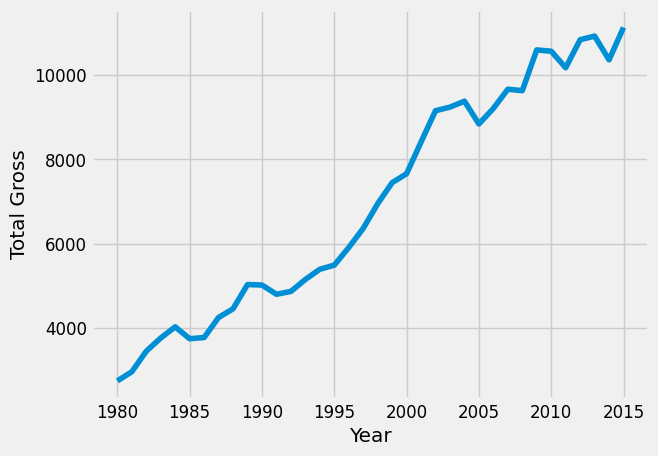

In [112]:
year = df_movies_by_year['Year']

plt.plot(year, total_gross)
plt.xlabel('Year')
plt.ylabel('Total Gross')

## 2. Population layers

The file below contains "Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States." Notice that `pandas.read_csv()` can read data directly from a URL. We are only going to investigate population trends for 2010 and 2014; the code below makes the appropriate table.

The SEX column contains numeric codes: 0 stands for the total, 1 for male, and 2 for female.

In [113]:
# Read the full Census table
census_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
df_full_census = pd.read_csv(census_url)

# Select columns from the full table and relabel some of them
df_partial_census = df_full_census[['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014']]
us_pop = df_partial_census.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2014': '2014'})

# Filter out AGE==999 (this represents the overall total)
us_pop = us_pop[us_pop['AGE']!=999]

To make it easier to compare population trends, it's sometimes nice to overlay plots on the same figure.

First, let's try to plot the total population by age for both 2010 and 2014 on the same plot. Since we want to do this for total population, we only want to include rows where `SEX = 0`, as follows:

In [114]:
us_pop_total = us_pop[us_pop['SEX']==0]
us_pop_total

,SEX,AGE,2010,2014
0,0,0,3951330,3949775
1,0,1,3957888,3949776
2,0,2,4090862,3959664
3,0,3,4111920,4007079
4,0,4,4077551,4005716
...,...,...,...,...
96,0,96,97161,120485
97,0,97,68893,83089
98,0,98,47037,59726
99,0,99,32178,41468


We'll also extract the columns as arrays so we can us Matplotlib:

In [115]:
age = us_pop_total['AGE']
pop_2010 = us_pop_total['2010']
pop_2014 = us_pop_total['2014']
age

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Name: AGE, Length: 101, dtype: int64

**Question 6.** In the following cell, create 2 separate age-vs-population line plots directly from the `us_pop_total` Table showing the 2010 and the 2014 populations.

Text(0, 0.5, 'Population (2014)')

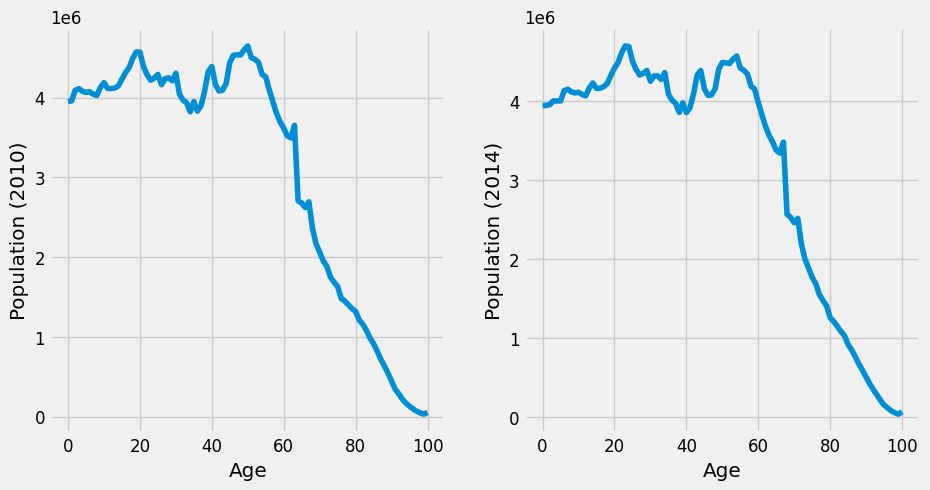

In [116]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(age, pop_2010)
plt.xlabel('Age')
plt.ylabel('Population (2010)')

plt.subplot(1, 2, 2)
plt.plot(age, pop_2014)
plt.xlabel('Age')
plt.ylabel('Population (2014)')

**Question 7.** Try to create an overlaid line plot showing the 2010 population by year with separate lines for male (SEX=1) and female (SEX=2). You will need to create new arrays from the subtables where (SEX=1) and (SEX=2)". You should also add a legend to the plot; to do this, you add a "label" attribute to the plot, and then call a command to display the label, as follows:

```
plt.plot(x,y,label='hello')
plt.legend()
```

Text(0, 0.5, 'Population (Millions)')

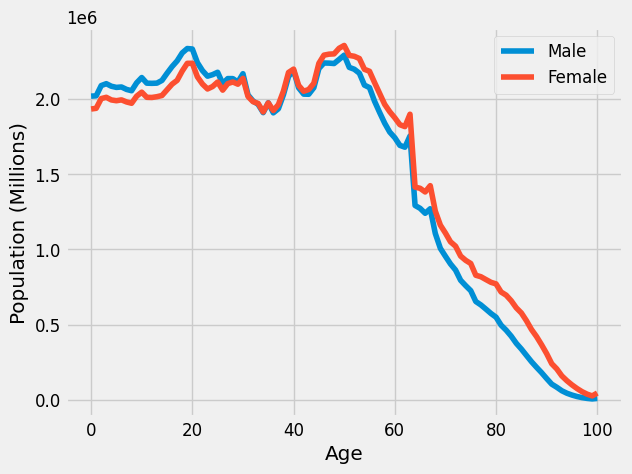

In [117]:
us_pop_2010_male = us_pop.loc[us_pop['SEX'] == 1, ['2010']]
us_pop_2010_male

us_pop_2010_female = us_pop.loc[us_pop['SEX'] == 2, ['2010']]
us_pop_2010_female


plt.plot(age, us_pop_2010_male, label='Male')
plt.plot(age, us_pop_2010_female, label='Female')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Population (Millions)')



Finally, let's make a layered bar chart. These are good to use for categorical data, like sex. The following code groups the Table by sex and adds up the total population across all ages:

In [118]:
pop_total = us_pop[['SEX', '2010', '2014']].groupby('SEX').sum()
pop_total = pop_total.reset_index()

In [119]:
pop_total.columns

Index(['SEX', '2010', '2014'], dtype='object')

Here's a way to overlap bar charts in Matplotlib. You have to specify the width of the bars, and then actually shift them over that same width so they show up appropriately. Kinda cumbersome!

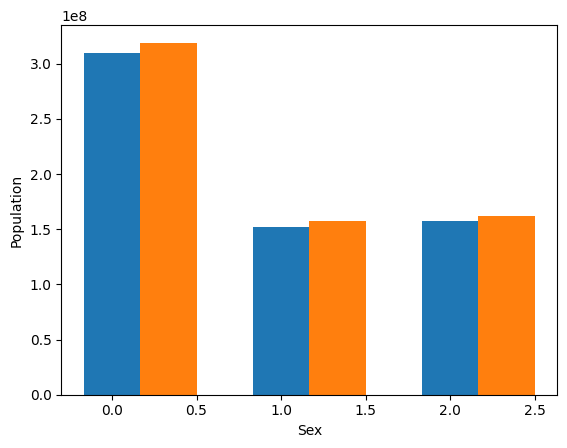

In [137]:
plt.bar(pop_total['SEX'], pop_total['2010'], width=1/3)
plt.bar(pop_total['SEX'] + 1/3, pop_total['2014'], width=1/3)
plt.xlabel('Sex')
plt.ylabel('Population')
plt.show()

# (Bonus) 3. Matplotlib Styling (Note there are no questions from this point on. Following is a tutorial with further info!)
Congratulations! You have now grasped some basic Matplotlib functions. However, some of you may think the figures are not beautiful enough to be put into some conference papers, and wonder if there are ways to styling the figures in Matplotlib.

In this section, we will introduce some styling method using generated data. It is encouraged to use the skills you learned in this section to beautify or customize the figures in previous sections or design some by yourself.

In [121]:
# The data
x = np.arange(0,10)
y = 2 * x

As stated at the beginning, **Axes** is what we generally think of as a plot. Inside a figure, there can be multiple plots, or more formally, multiple axes. We will use the axes here instead of just using plt to have some more advanced control over the figures.

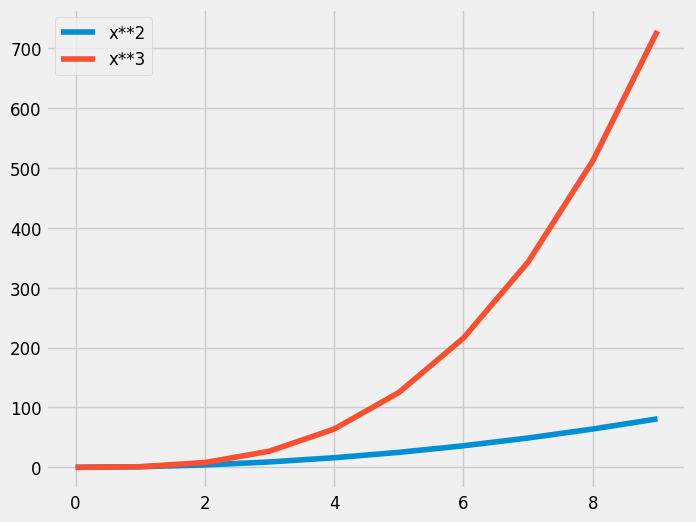

In [122]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

## Legend location
The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

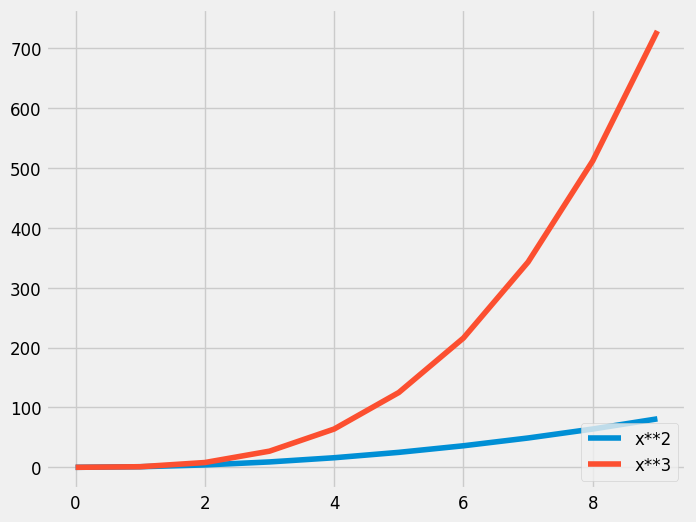

In [123]:
# Lots of options....

ax.legend(loc='upper right') # upper right corner
ax.legend(loc='upper left') # upper left corner
ax.legend(loc='lower left') # lower left corner
ax.legend(loc='lower center') # lower center
ax.legend(loc='lower right') # lower right corner

# .. many more options are available

# Most common to choose
# ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Color
Previously, we just use 'b-', 'g-' and some simplified MATLAB-like syntax to specify the color and line styles. In fact, we have far more colors available (all RGB colors can be chosen by using the hex code).

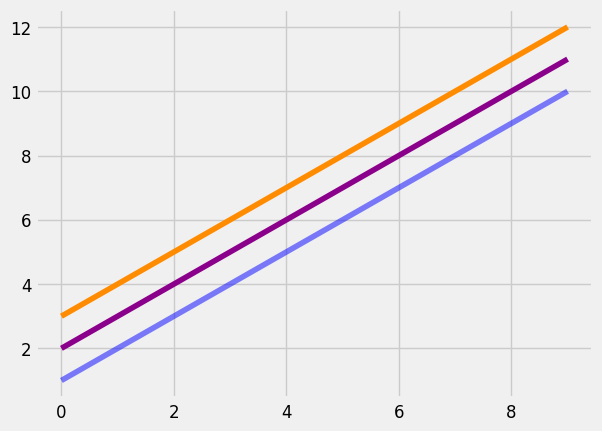

In [124]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code

## Line Width
To change the line width, we can use the `linewidth` or `lw` keyword argument.

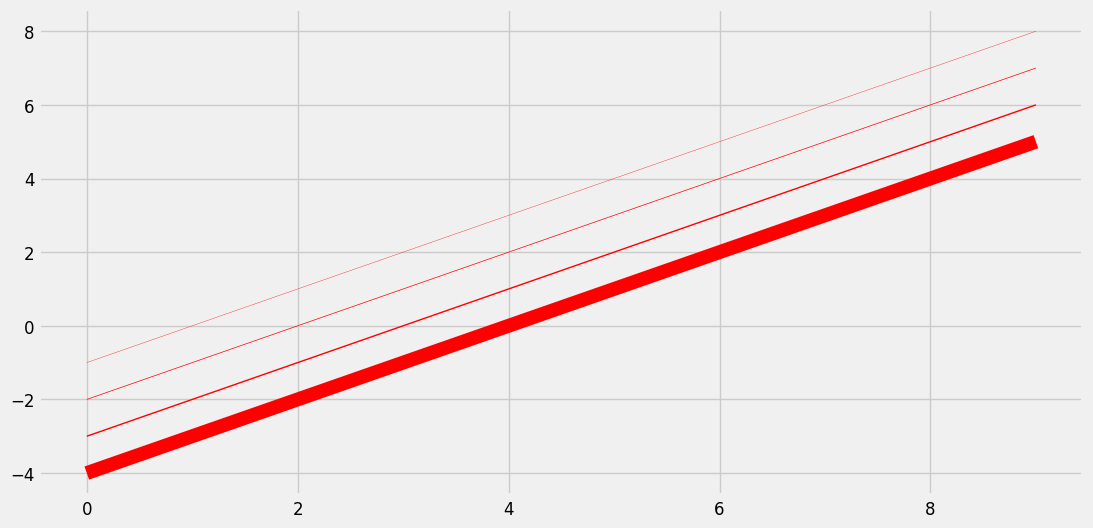

In [125]:
fig, ax = plt.subplots(figsize=(12,6))

# Use linewidth or lw
ax.plot(x, x-1, color="red", linewidth=0.25)
ax.plot(x, x-2, color="red", lw=0.50)
ax.plot(x, x-3, color="red", lw=1)
ax.plot(x, x-4, color="red", lw=10)

## Line Styles
There are many linestyles to choose from, here are some examples.

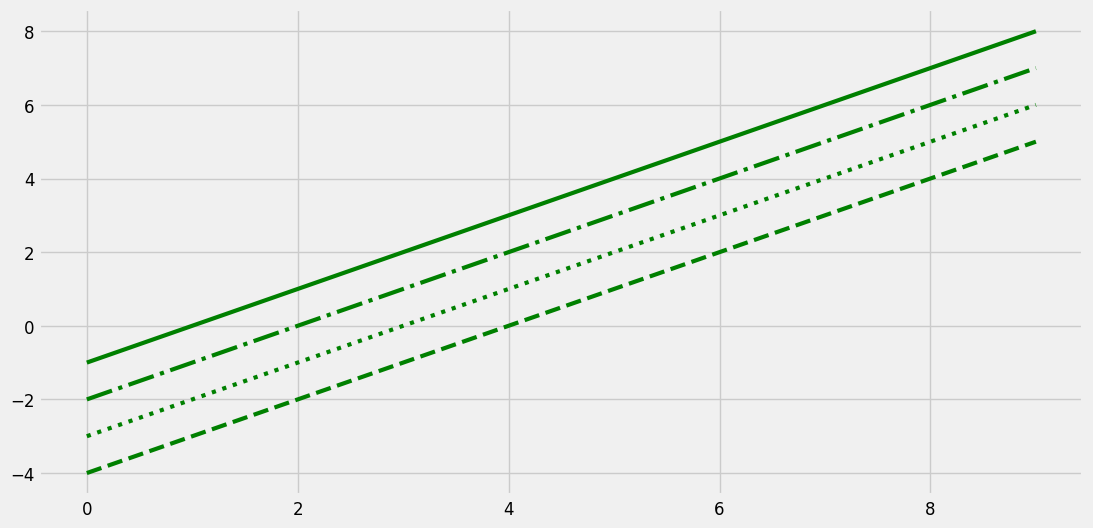

In [126]:
# possible linestype options ‘--‘, ‘–’, ‘-.’, ‘:’, ‘steps’
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x-1, color="green", lw=3, linestyle='-') # solid
ax.plot(x, x-2, color="green", lw=3, ls='-.') # dash and dot
ax.plot(x, x-3, color="green", lw=3, ls=':') # dots
ax.plot(x, x-4, color="green", lw=3, ls='--') # dashes

## Markers Styles

Huge list of marker types can be found here: https://matplotlib.org/3.2.2/api/markers_api.html

Some examples are shown below for you to know what is possible with marker's styles

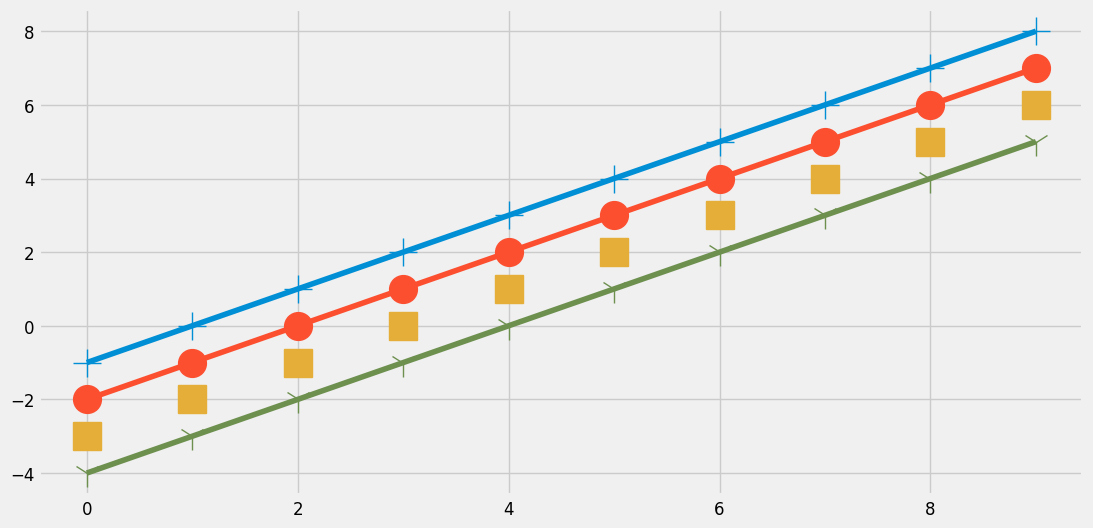

In [127]:
fig, ax = plt.subplots(figsize=(12,6))

# Use marker for string code
# Use markersize or ms for size

ax.plot(x, x-1,marker='+',markersize=20)
ax.plot(x, x-2,marker='o',ms=20) #ms can be used for markersize
ax.plot(x, x-3,marker='s',ms=20,lw=0) # make linewidth zero to see only markers
ax.plot(x, x-4,marker='1',ms=20)

## (Bonus) 4. Advanced Matplotlib Commands
We cover some advanced features of Matplotlib which you might not use as often. However, having them in your mind will help you imagine some cool visualization effect that you can achieve with Matplotlib.

## Logarithmic scale
It is possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. The axes' scales are set separately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

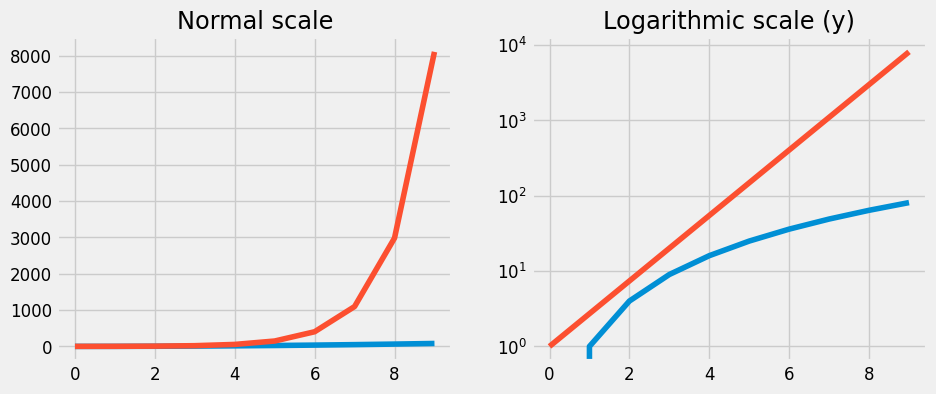

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

## Placement of ticks and custom tick labels
We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

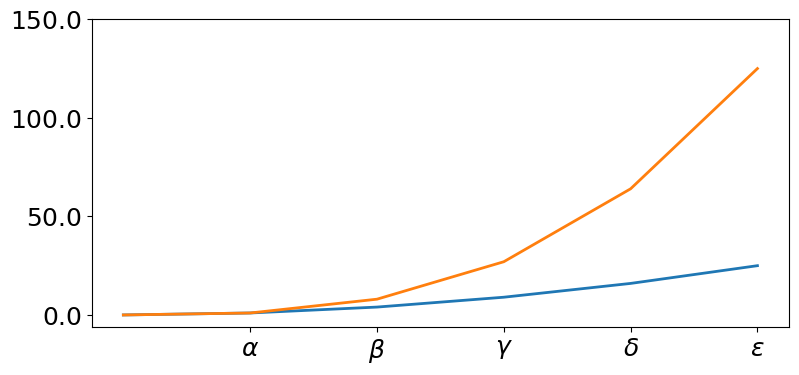

In [129]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 4))

x= np.arange(0,6)
ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

## Axis Grid
We can add grid in the figures. Also, we can customize the styles of the grid.

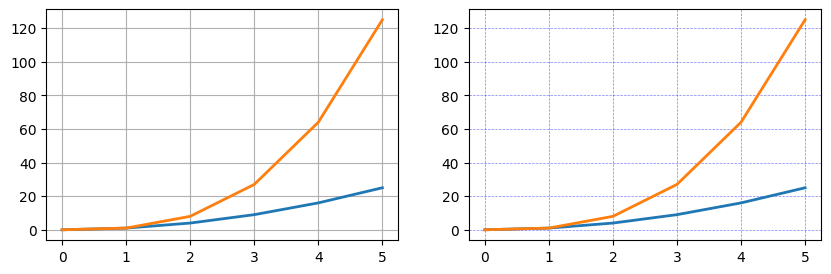

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

## Twin Axes
Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

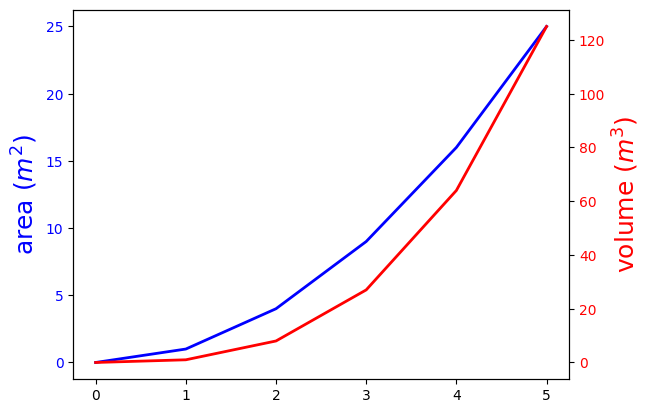

In [131]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## Axes where x and y is zero
Until now, we've seen plots all in a rectangle. But back in high school and middle school, we've seen many plots where the coordinate origin is not at the edge but in the middle. Let's just look at an example.

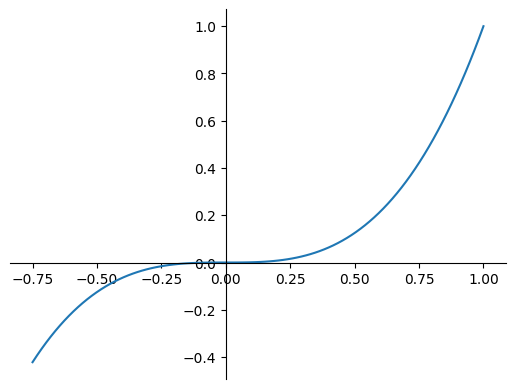

In [132]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Figures inside figures

Manually adding axes using `add_axes` is useful for adding insets to figures

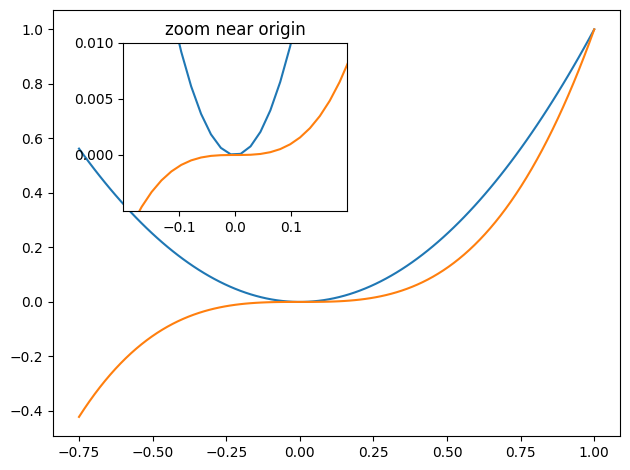

In [133]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

That's it for lab 4! There are SO many ways to informatively visualize your data - we encourage you to read tutorials and look through Matplotlib galleries to learn more!